Este proyecto tiene como objetivo, realizar un análisis a profundidad de los datos de contribuyentes regulares durante el trimestre enero - marzo de 2020. 
Para ello, emplearemos técnicas de análisis estadístico descriptivo y técnicas de análisis predictivo con apoyo del aprendizaje automático.

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Análisis descriptivo

In [67]:
df = pd.read_excel(r'E:\ANTONIO_BOZA\DATA_WAKU\DETECCIÓN EVASORES SENIAT Vs SEDEMAT\DETECCION FRAUDE\AFOROS ENERO-FEB-MAR 2020_ML.xlsx')

In [68]:
df.head()

,RIF,RIM,CONTRIBUYENTE,ACTIVIDAD,MONTO LIQUIDADO PAGADO,MONTO IMPUESTO,ALICUOTA,ALICUOTA_PCT,MONTO INGRESOS,CLASE
0,J-314950134,7000000505,GESTION ESTRATEGIA LOGISTICA SERV. C.A,Servicios para la construcción o ejecución de ...,1200000.00,1.200000,2.817895,0.028179,4258.498319,0
1,J-303350623,7000001853,"JOSE A MARTINEZ Y CIA, S.A",Arrendamiento de inmuebles.,3055500.09,3.055500,5.000000,0.050000,6111.000180,0
2,J-299169366,7000001743,"COLORZULIANO,C.A(SUCURSAL COSTA VERDE)","Detal de pinturas, lacas, barnices y materiale...",22326356.55,22.326357,3.000000,0.030000,74421.188500,0
3,J-402535546,1900045628,"LABORATORIO CLINICO SHA, C.A","Servicios de clínica, incluye: hotelería, farm...",6952234.10,6.952234,1.500000,0.015000,46348.227333,0
4,G-200091487,2900033795,"BANCO BICENTENARIO, DEL PUEBLO, DE LA CLASE OB...","Bancos, empresas de seguros y reaseguros, casa...",960000.00,0.960000,6.000000,0.060000,1600.000000,0


In [69]:
# Chequeamos información general de los datos

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 10 columns):
RIF                       5952 non-null object
RIM                       5951 non-null object
CONTRIBUYENTE             5952 non-null object
ACTIVIDAD                 5952 non-null object
MONTO LIQUIDADO PAGADO    5952 non-null float64
MONTO IMPUESTO            5952 non-null float64
ALICUOTA                  5952 non-null float64
ALICUOTA_PCT              5952 non-null float64
MONTO INGRESOS            5952 non-null float64
CLASE                     5952 non-null int64
dtypes: float64(5), int64(1), object(4)
memory usage: 465.1+ KB


In [71]:
print(df.describe())

       MONTO LIQUIDADO PAGADO  MONTO IMPUESTO     ALICUOTA  ALICUOTA_PCT  \
count            5.952000e+03     5952.000000  5952.000000   5952.000000   
mean             2.730239e+07       27.302390     2.892787      0.028928   
std              3.119135e+08      311.913527     1.007718      0.010077   
min              5.918840e+03        0.005919     1.000000      0.010000   
25%              1.120000e+06        1.120000     2.000000      0.020000   
50%              3.000000e+06        3.000000     2.817895      0.028179   
75%              7.438521e+06        7.438521     3.000000      0.030000   
max              1.549779e+10    15497.785493     6.000000      0.060000   

       MONTO INGRESOS   CLASE  
count    5.952000e+03  5952.0  
mean     9.844579e+04     0.0  
std      9.483552e+05     0.0  
min      2.100448e+01     0.0  
25%      4.000000e+03     0.0  
50%      1.031055e+04     0.0  
75%      2.879181e+04     0.0  
max      5.165928e+07     0.0  


In [72]:
# Validamos correlación entre variables

In [73]:
df.drop(inplace=True, columns= ['CLASE'])
corr = round(df.corr(), 3)
corr.style.background_gradient()

,MONTO LIQUIDADO PAGADO,MONTO IMPUESTO,ALICUOTA,ALICUOTA_PCT,MONTO INGRESOS
MONTO LIQUIDADO PAGADO,1,1,0.035,0.035,0.968
MONTO IMPUESTO,1,1,0.035,0.035,0.968
ALICUOTA,0.035,0.035,1,1,-0.012
ALICUOTA_PCT,0.035,0.035,1,1,-0.012
MONTO INGRESOS,0.968,0.968,-0.012,-0.012,1


In [74]:
varianza = np.var(df['MONTO IMPUESTO'])
std = np.std(df['MONTO IMPUESTO'])
mean = np.mean(df['MONTO IMPUESTO'])
monto_total = df['MONTO IMPUESTO'].sum()
print('La varianza del Monto pagado es :', round(varianza,2))
print('La desviación estandar del Monto pagado es :', round(std,2))
print('El promedio del Monto pagado es :', round(mean,2))
print('El Monto total pagado es :', round(monto_total,2))

La varianza del Monto pagado es : 97273.7
La desviación estandar del Monto pagado es : 311.89
El promedio del Monto pagado es : 27.3
El Monto total pagado es : 162503.82


In [75]:
# Definimos una función para graficar la curva del ECDF (Empirical Acumulative Distribution Function)
def ecdf(data):
    #Número de puntos a considerar
    n = len(data)
    # Datos para eje X
    x = np.sort(data)
    # Datos para eje Y
    y = np.arange(1, 1+n)/n
    return x,y

In [76]:
# Graficamos el ECDF para "Monto Impuestos"

In [77]:
x_imp, y_imp = ecdf(df['MONTO IMPUESTO'])

# Análisis de datos extremos (Outliers)

In [78]:
# Calculamos los percentiles (quartiles) 25% y 75%

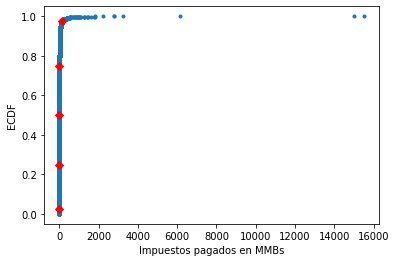

In [79]:
x = df['MONTO IMPUESTO']
percentiles = np.array([2.5, 25, 50, 75, 97.5])
perct_imp = np.percentile(x, percentiles)

plt.plot(x_imp, y_imp, marker = '.', linestyle='none')
plt.xlabel('Impuestos pagados en MMBs')
plt.ylabel('ECDF')
plt.plot(perct_imp, percentiles/100, marker = 'D', color='red', linestyle = 'none')

plt.show()

#print(perct_imp)
# Q1 = np.percentile(x, 25)
# Q3 = np.percentile(x, 75)
# print('Q1 es ', Q1)
# print('Q3 es ', Q3)

In [80]:
# Definimos los umbrales superior e inferior
# Calculamos el rango interquartílico
# rangointer = Q3-Q1
# print(rangointer)
# Q1 = np.percentile(x, 25)
# Q3 = np.percentile(x, 75)
# umbral_superior = Q3 + 1.5*rangointer
# umbral_inferior = Q1

# print('El umbral superior es ', umbral_superior)
# print('El umbral inferior es ', umbral_inferior)

In [81]:
# Comprobamos el porcentaje de casos hacia arriba y hacia abajo
# np.mean(x>umbral_superior)

In [82]:
# np.mean(x<umbral_inferior)

# Normalización de valores en df
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

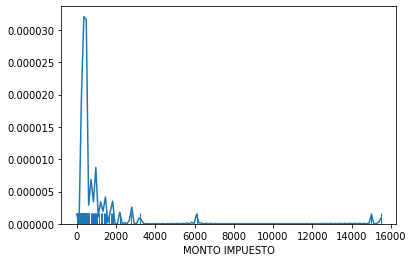

In [83]:
sns.distplot(x, hist=False, rug=True);

In [84]:
# Escalamos la Data (centrada a cero y con desviación estandar = 1)
from sklearn import preprocessing

X_scaled = preprocessing.scale(x)

In [85]:
X_scaled.mean(axis=0)

9.55030558817339e-18

In [86]:
X_scaled.std(axis=0)

0.9999999999999998

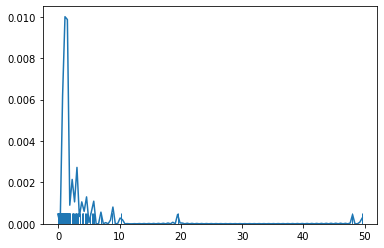

In [87]:
sns.distplot(X_scaled, hist=False, rug=True);

In [88]:
from sklearn.covariance import EllipticEnvelope
outliers = EllipticEnvelope(contamination = 0.05)
X_outliers = np.array(X_scaled).reshape(-1, 1)

In [89]:
# Entrenamos nuestro modelo
outliers.fit(X_outliers)

EllipticEnvelope(assume_centered=False, contamination=0.05, random_state=None,
                 store_precision=True, support_fraction=None)

In [90]:
# Hacemos nuestra predicción, cuáles valores entran dentro del 5% que queremos detectar.
pred = outliers.predict(X_outliers)

In [91]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [92]:
# Detectamos cuántos -1 hay en el array (Los outliers)
elips_outliers = np.where(pred==-1)[0]

In [93]:
df.iloc[65]

RIF                                   J-070083786
RIM                                    2000051312
CONTRIBUYENTE             INDUSTRIAS SALINERAS CA
ACTIVIDAD                       Industria de sal.
MONTO LIQUIDADO PAGADO                1.52478e+08
MONTO IMPUESTO                            152.478
ALICUOTA                                  2.81789
ALICUOTA_PCT                            0.0281789
MONTO INGRESOS                             541107
Name: 65, dtype: object

In [94]:
print(elips_outliers)

[  52   65   66   70  165  181  191  218  232  237  252  253  289  311
  326  329  338  345  369  379  387  389  392  419  463  495  498  512
  521  545  551  562  575  580  581  582  592  619  658  667  668  692
  720  743  778  783  800  814  826  873  881  883  884  901  918  926
  975 1107 1148 1166 1171 1194 1196 1200 1232 1235 1238 1239 1240 1252
 1253 1257 1259 1273 1287 1291 1299 1305 1348 1350 1355 1363 1365 1367
 1369 1370 1412 1438 1479 1486 1504 1510 1516 1524 1528 1542 1581 1583
 1608 1612 1631 1635 1653 1654 1732 1751 1753 1811 1817 1851 1852 1862
 1879 1889 1892 1903 1913 1922 1924 1931 1966 1969 1970 1978 1979 1984
 1990 2006 2020 2027 2054 2090 2097 2105 2106 2118 2119 2136 2158 2162
 2163 2164 2166 2169 2196 2197 2209 2226 2228 2231 2237 2239 2271 2282
 2317 2322 2331 2335 2367 2384 2489 2512 2513 2563 2574 2590 2602 2611
 2613 2614 2617 2643 2646 2649 2679 2697 2703 2719 2741 2754 2760 2789
 2801 2802 2807 2813 2824 2855 2857 2877 2890 2980 3051 3065 3075 3077
 3128 

In [95]:
len(elips_outliers)

298

In [96]:
df.iloc[elips_outliers,:]

,RIF,RIM,CONTRIBUYENTE,ACTIVIDAD,MONTO LIQUIDADO PAGADO,MONTO IMPUESTO,ALICUOTA,ALICUOTA_PCT,MONTO INGRESOS
52,J-300619460,2000021932,"BANCO OCCIDENTAL DE DESCUENTO, BANCO UNIVERSAL...","Bancos, empresas de seguros y reaseguros, casa...",8.795181e+07,87.951813,6.000000,0.060000,1.465864e+05
65,J-070083786,2000051312,INDUSTRIAS SALINERAS CA,Industria de sal.,1.524783e+08,152.478334,2.817895,0.028179,5.411073e+05
66,J-070558393,2000080707,"SUPER ENNE 2000 72, C.A","Cadenas de supermercados, hipermercados, megat...",4.502377e+08,450.237744,1.500000,0.015000,3.001585e+06
70,J-000389233,2000080007,SEGUROS CARACAS DE LIBERTY MUTUAL C.A.,"Bancos, empresas de seguros y reaseguros, casa...",2.207416e+09,2207.415541,6.000000,0.060000,3.679026e+06
165,J-406327840,2900050168,"ALIMENTOS COMERCIAL LA GRAN FORTUNA, C.A","Abastos, bodegas y pequeños detales de víveres.",1.124796e+08,112.479598,2.000000,0.020000,5.623980e+05
...,...,...,...,...,...,...,...,...,...
5869,J-403194181,2900043577,"DISTRIBUIDORA SANCHEZ ORDOÑEZ, C.A","Cosméticos, perfumes y artículos de tocador.",6.902885e+07,69.028849,3.000000,0.030000,2.300962e+05
5874,J-302938929,2000813225,DA VINCI BARRA RISTORANTE C.A.,"Restaurantes, fuentes de soda, pizzerías, hela...",1.503091e+08,150.309071,2.000000,0.020000,7.515454e+05
5882,J-309233831,207P000709,MARIU INVERSIONES C.A.,"Distribución de pinturas, lacas, barnices y ma...",1.050161e+08,105.016079,2.817895,0.028179,3.726757e+05
5899,J-301609573,2000813875,ABADIA DE LAS MERCEDES C.A,Agencias Funerarias y Capillas Velatorias.,2.174781e+08,217.478131,2.817895,0.028179,7.717752e+05


In [97]:
datos_atipicos = df.iloc[elips_outliers,:]

In [102]:
# Retiramos a Industrias Salinas
# df.drop([1,2])
datos_atipicos.drop([65], inplace=True)

C:\Users\WAKU\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
datos_atipicos

,RIF,RIM,CONTRIBUYENTE,ACTIVIDAD,MONTO LIQUIDADO PAGADO,MONTO IMPUESTO,ALICUOTA,ALICUOTA_PCT,MONTO INGRESOS
52,J-300619460,2000021932,"BANCO OCCIDENTAL DE DESCUENTO, BANCO UNIVERSAL...","Bancos, empresas de seguros y reaseguros, casa...",8.795181e+07,87.951813,6.000000,0.060000,1.465864e+05
66,J-070558393,2000080707,"SUPER ENNE 2000 72, C.A","Cadenas de supermercados, hipermercados, megat...",4.502377e+08,450.237744,1.500000,0.015000,3.001585e+06
70,J-000389233,2000080007,SEGUROS CARACAS DE LIBERTY MUTUAL C.A.,"Bancos, empresas de seguros y reaseguros, casa...",2.207416e+09,2207.415541,6.000000,0.060000,3.679026e+06
165,J-406327840,2900050168,"ALIMENTOS COMERCIAL LA GRAN FORTUNA, C.A","Abastos, bodegas y pequeños detales de víveres.",1.124796e+08,112.479598,2.000000,0.020000,5.623980e+05
181,J-308381233,2900013526,ZAPATERIA GASOLINA EXTRA C.A. (SUCURSAL),"Distribución y venta de calzados, carteras y o...",7.539444e+07,75.394438,3.000000,0.030000,2.513148e+05
...,...,...,...,...,...,...,...,...,...
5869,J-403194181,2900043577,"DISTRIBUIDORA SANCHEZ ORDOÑEZ, C.A","Cosméticos, perfumes y artículos de tocador.",6.902885e+07,69.028849,3.000000,0.030000,2.300962e+05
5874,J-302938929,2000813225,DA VINCI BARRA RISTORANTE C.A.,"Restaurantes, fuentes de soda, pizzerías, hela...",1.503091e+08,150.309071,2.000000,0.020000,7.515454e+05
5882,J-309233831,207P000709,MARIU INVERSIONES C.A.,"Distribución de pinturas, lacas, barnices y ma...",1.050161e+08,105.016079,2.817895,0.028179,3.726757e+05
5899,J-301609573,2000813875,ABADIA DE LAS MERCEDES C.A,Agencias Funerarias y Capillas Velatorias.,2.174781e+08,217.478131,2.817895,0.028179,7.717752e+05


In [108]:
# Exportamos el archivo a excel
archivo = datos_atipicos.to_excel('Atipicos_Trimestre_Enero_Marzo_2020_Rev.xlsx', index=False)

# Enfoque basado en agrupamiento para la detección de anomalías

In [95]:
# Vamos a utilizar la agrupación de K-Means que nos ayudará a agrupar los puntos de datos (Monto Impuesto)

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import kmeans
from scipy import cluster
from sklearn.cluster import KMeans

In [154]:
df = pd.read_excel(r'E:\ANTONIO_BOZA\DATA_WAKU\DETECCIÓN EVASORES SENIAT Vs SEDEMAT\DETECCION FRAUDE\AFOROS ENERO-FEB-MAR 2020_ML.xlsx')

In [155]:
df.head()

,RIF,RIM,CONTRIBUYENTE,ACTIVIDAD,MONTO LIQUIDADO PAGADO,MONTO IMPUESTO,ALICUOTA,ALICUOTA_PCT,MONTO INGRESOS,CLASE
0,J-314950134,7000000505,GESTION ESTRATEGIA LOGISTICA SERV. C.A,Servicios para la construcción o ejecución de ...,1200000.00,1.200000,2.817895,0.028179,4258.498319,0
1,J-303350623,7000001853,"JOSE A MARTINEZ Y CIA, S.A",Arrendamiento de inmuebles.,3055500.09,3.055500,5.000000,0.050000,6111.000180,0
2,J-299169366,7000001743,"COLORZULIANO,C.A(SUCURSAL COSTA VERDE)","Detal de pinturas, lacas, barnices y materiale...",22326356.55,22.326357,3.000000,0.030000,74421.188500,0
3,J-402535546,1900045628,"LABORATORIO CLINICO SHA, C.A","Servicios de clínica, incluye: hotelería, farm...",6952234.10,6.952234,1.500000,0.015000,46348.227333,0
4,G-200091487,2900033795,"BANCO BICENTENARIO, DEL PUEBLO, DE LA CLASE OB...","Bancos, empresas de seguros y reaseguros, casa...",960000.00,0.960000,6.000000,0.060000,1600.000000,0


In [156]:
df['MONTO IMPUESTO'].min()

0.00591884

In [157]:
df['MONTO IMPUESTO'].max()

15497.785493309999

In [47]:
df['STDV']= df['MONTO IMPUESTO'].std()

In [48]:
df['STDV'].shape

(5952,)

In [49]:
df['MONTO IMPUESTO'].shape

(5952,)

In [54]:
df['stdv_dif'] = df['MONTO IMPUESTO']-df['STDV']

In [55]:
df['stdv_dif'].shape

(5952,)

In [42]:
# Graficamos el monto Vs la desviación estándar

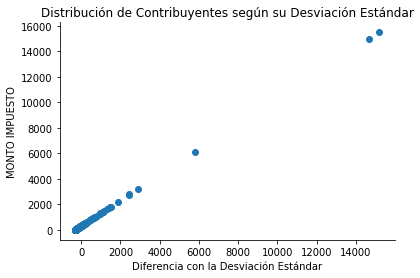

In [57]:
plt.scatter(df['stdv_dif'], df['MONTO IMPUESTO'])
plt.xlabel('Diferencia con la Desviación Estándar')
plt.ylabel('MONTO IMPUESTO')
plt.title("Distribución de Contribuyentes según su Desviación Estándar")
sns.despine()

In [158]:
data = np.array(df['MONTO IMPUESTO']).reshape(-1, 1)

In [159]:
# Definimos el número de clústers o grupos óptimo

In [160]:
ks = range(1,6)
inertias = []
for k in ks:
    #Creamos una instancia de KMeans con k clústers
    model = KMeans(n_clusters=k)
    
    #Entrenamos el modelo con la data
    model.fit(data)
    
    #Agregamos la inercia a la lista "inertias"
    inertias.append(model.inertia_)    

In [161]:
#Graficamos Clústers Vs Inercia

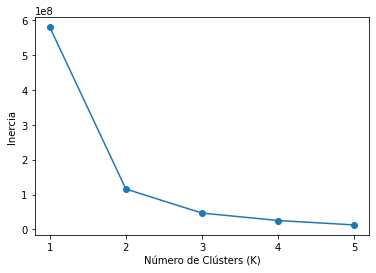

In [162]:
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de Clústers (K)')
plt.ylabel('Inercia')
plt.xticks(ks)
plt.show()

In [163]:
# Del gráfico anterior deducimos que el número óptimo de Clústers es 3

In [164]:
# Nos aseguramos que la data esté en formato numérico adecuado
data = data.astype('float64')

In [165]:
# Aplicamos kmeans con n_clusters = 3
centroids, avg_distance = kmeans(data, 3)

In [167]:
# Obtenemos los grupos (groups) y las distancias (cdist)
groups, cdist = cluster.vq.vq(data, centroids)

In [169]:
data.shape

(5952, 1)

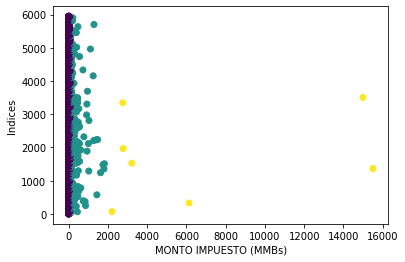

In [170]:
# Graficamos 
plt.scatter(data, np.arange(0,5952), c=groups)
plt.xlabel('MONTO IMPUESTO (MMBs)')
plt.ylabel('Indices')
plt.show()